## Advanced Regression Assignment - Part 1

In [1]:
#import all libraries
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

pd.set_option('display.max_columns',None)

import os

### Data Import

In [2]:
housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing.shape

(1460, 81)

### Data understanding and exploration

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
housing.describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
5%,73.950000,20.000000,34.000000,3311.700000,4.000000,4.000000,1916.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,519.300000,672.950000,0.000000,0.000000,848.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,1930.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,88000.000000
10%,146.900000,20.000000,44.000000,5000.000000,5.000000,5.000000,1924.900000,1950.000000,0.000000,0.000000,0.000000,74.900000,636.900000,756.900000,0.000000,0.000000,912.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1945.000000,1.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2006.000000,106475.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000

In [6]:
# Let us check SalePrice for now
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

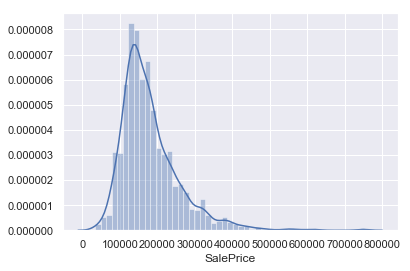

In [7]:
sns.distplot(housing['SalePrice'])

Looks like the "SalePrice" is positive skewed.

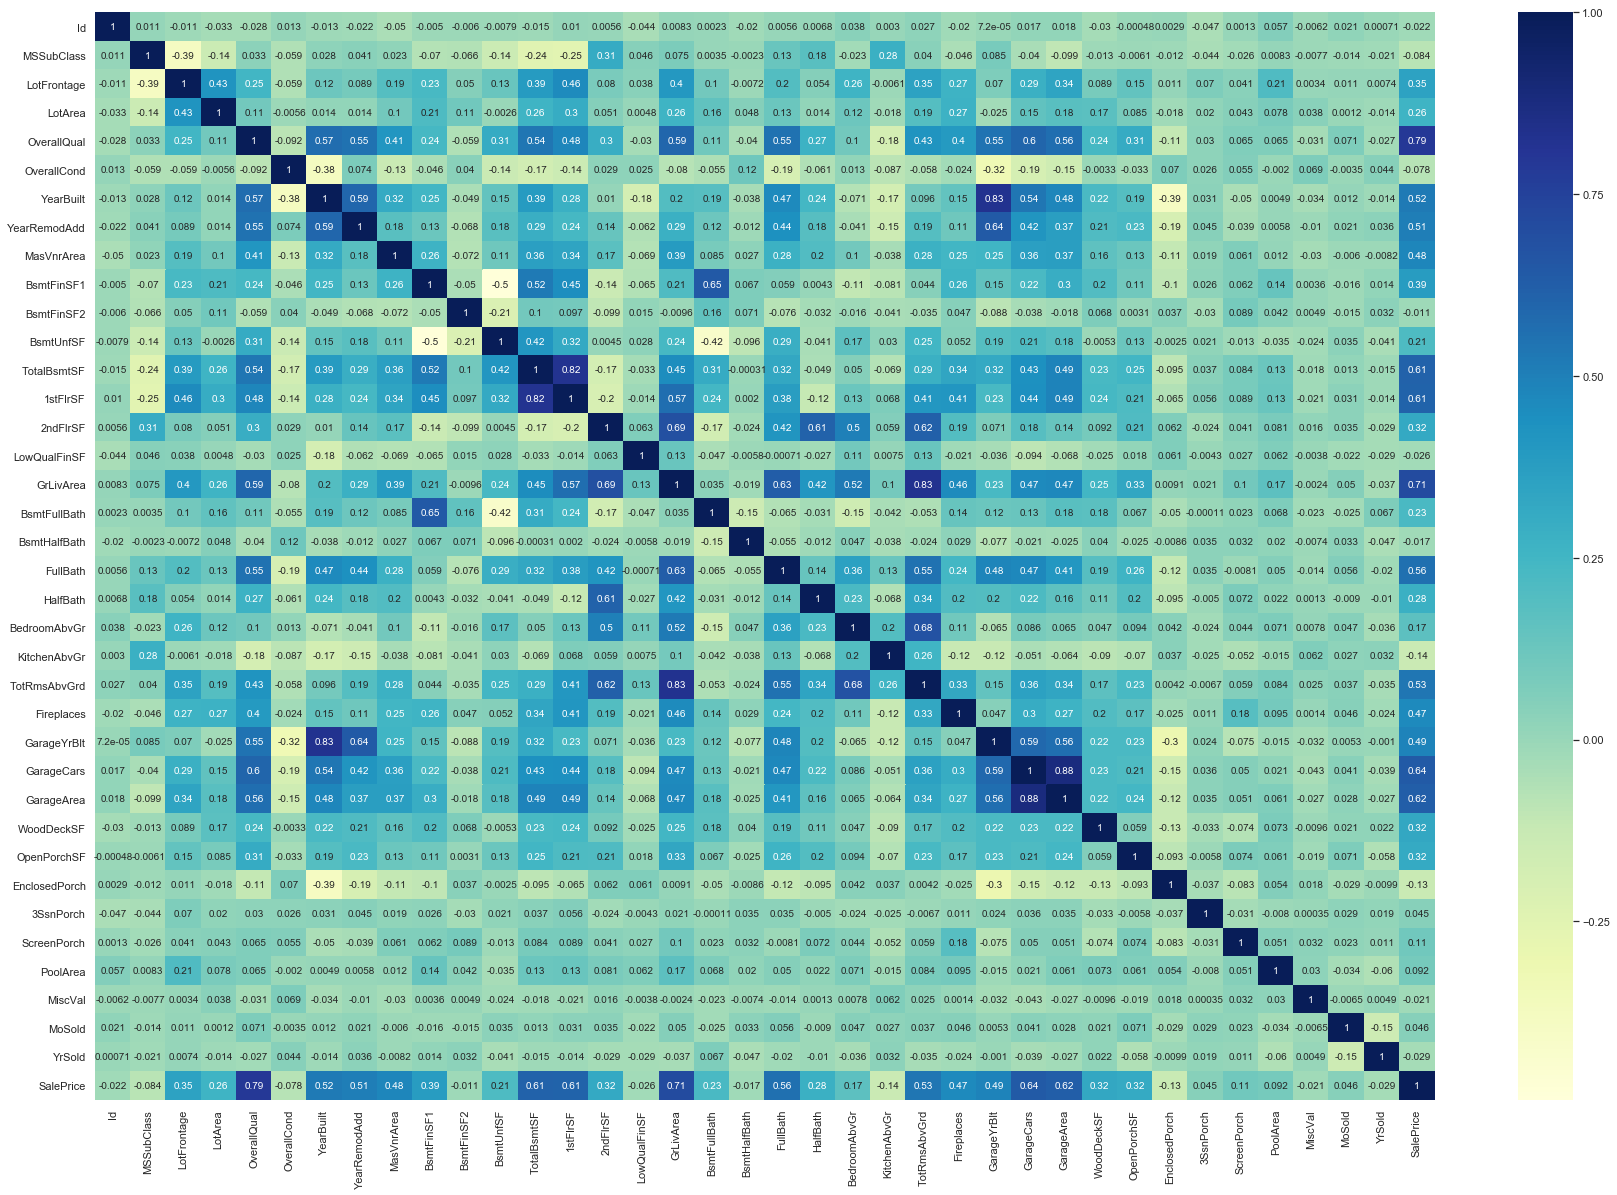

In [8]:
plt.figure(figsize=(30,20))

cor=housing.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

Though we can see some correlation,things are not very clear. So let us see salePrice correlation with top 10 variables.

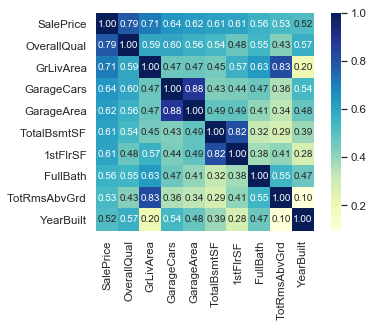

In [9]:
#saleprice correlation matrix
k = 10
cols = cor.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.05)
hm = sns.heatmap(cm, cmap="YlGnBu", cbar=True, annot=True, square=True,fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

1. `OverallQual` and `GrLivArea` are highly correlated with `SalePrice`. And other variables among highly correlated to `SalePrice` being `GarageArea`, `TotalBasementSF`, `1stFloorSF`,`TotalRoomsabvGrade`,`FullBath` and `YearBuilt`
We can also see few intercorrelated variables. Such as:
2. `GarageCars` and `GarageArea` are strongly correlated variables to each other.
3. `TotalBsmtSF` and `1stFloor` are again correlated with each other.
4. `TotRmsAbvGrd` and `GrLivArea` are correlated to each other.

As we saw few variables are highly correlated to `SalesPrice`. Let us look at their pairplot

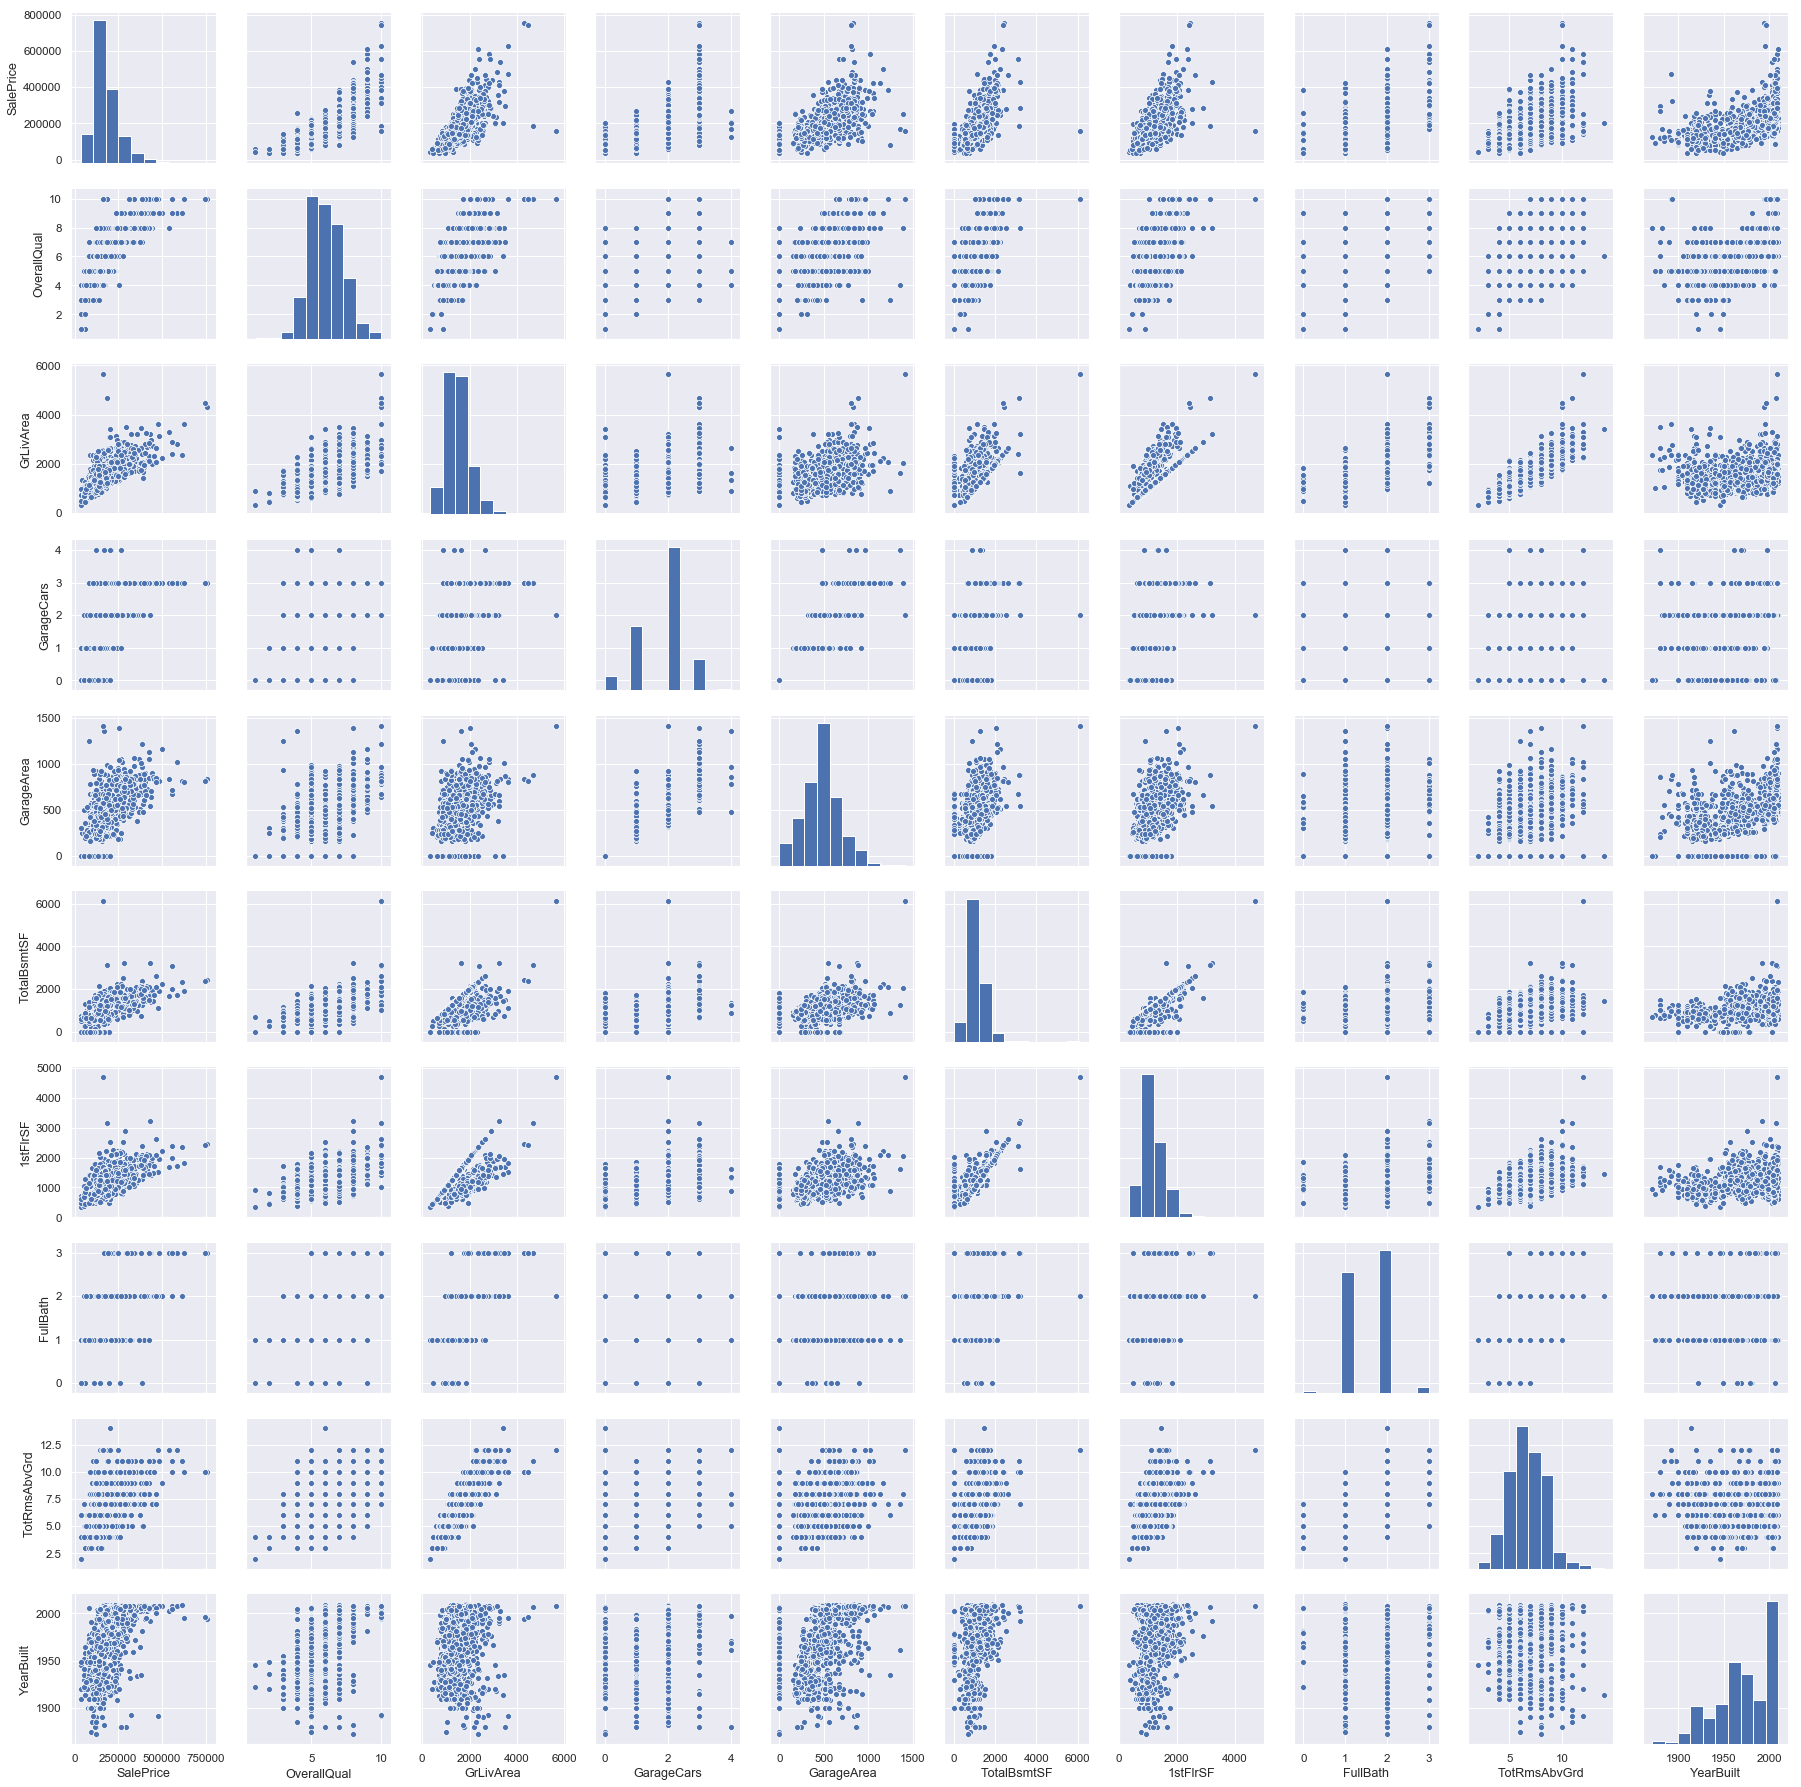

In [10]:
columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea','TotalBsmtSF', '1stFlrSF','FullBath',
           'TotRmsAbvGrd','YearBuilt']
sns.pairplot(housing[columns], height = 2.5)
plt.show()

'GrLivArea','GarageArea','TotalBsmtSF', '1stFlrSF','FullBath','YearBuilt' are lineraly related to `SalePrice`.
However there is high collinearity as well among variables.For instance we saw that TotalBsmtSF and 1stFloor are highly correlated with each other and we will be either of the variable further.

### Data cleaning and exploration

In [11]:
#checking for duplicates
housing.duplicated(subset = ['Id'], keep = False).sum()

0

In [12]:
# checking if any of the column has single value
unique = housing.nunique()
unique = unique[unique.values ==1]
unique

Series([], dtype: int64)

In [13]:
#Lets check % of null values and try to eliminate the columns which has more null values
round(100*(housing.isnull().sum()/len(housing.index)),2).sort_values(ascending = False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
                 ...  
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
3SsnPorch         0.00
BsmtUnfSF         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
Functional 

#### PoolQC

In [14]:
housing.PoolQC = housing.PoolQC.replace(np.nan,'NA')

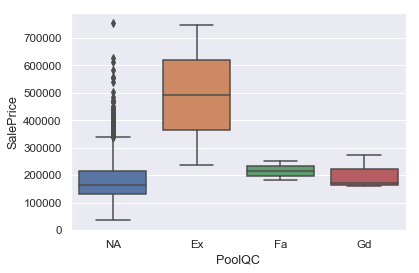

In [15]:
sns.boxplot(y = 'SalePrice',x='PoolQC',data = housing)

Although we can see that having a pool raises the sale price, we have very small amount of data of houses with pool available. Therefore we can safely drop this column.

#### MiscFeature

In [16]:
housing.MiscFeature = housing.MiscFeature.replace(np.nan,'NA')

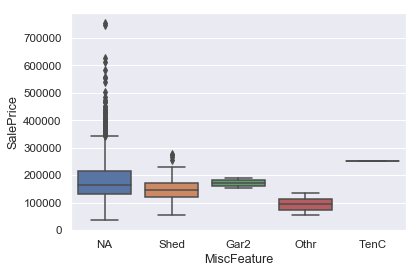

In [17]:
sns.boxplot(y = 'SalePrice',x='MiscFeature',data = housing)

There is no significant change in SalePrice. So we can safely drop this column.

#### Alley

In [18]:
housing.Alley = housing.Alley.replace(np.nan,'NA')

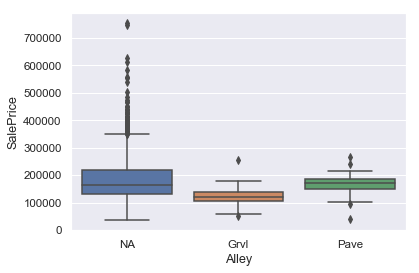

In [19]:
sns.boxplot(y = 'SalePrice',x='Alley',data = housing)

There is no significant change in SalePrice. So we can safely drop this column.

#### Fence

In [20]:
housing.Fence = housing.Fence.replace(np.nan,'NA')

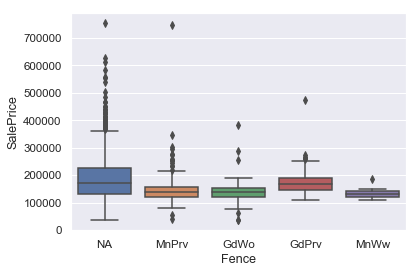

In [21]:
sns.boxplot(y = 'SalePrice',x='Fence',data = housing)

There is no significant change in SalePrice. So we can safely drop this column.

#### FireplaceQu

In [22]:
housing.FireplaceQu = housing.FireplaceQu.replace(np.nan,'NA')

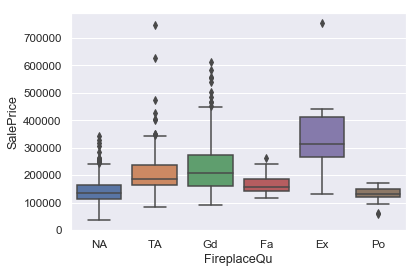

In [23]:
sns.boxplot(y = 'SalePrice',x='FireplaceQu',data = housing)

In [24]:
housing.FireplaceQu.value_counts()

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [25]:
# Let us eliminate columns all the above discussed columns which is having more than 30% nullvalues.
housing = housing.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis =1)

#### LotFrontage

In [26]:
# Let us inspect 'LotFrontage' column
housing['LotFrontage'].value_counts().head(10)

60.0    143
70.0     70
80.0     69
50.0     57
75.0     53
65.0     44
85.0     40
78.0     25
21.0     23
90.0     23
Name: LotFrontage, dtype: int64

In [27]:
housing['LotFrontage'].isnull().sum()

259

In [28]:
housing['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

As there are 259 nulls values, let us impute the nulls values by - median value. And as LotFrontage is Linear feet of street connected to property. Hence it can be safely assumed that the houses in the same neighbour hood will have similar LotFrontage. There imputing the null values based on the neighbour hood of the house.

In [29]:
housing.LotFrontage = housing.groupby('Neighborhood').LotFrontage.apply(lambda x: x.fillna(x.median()))

#### Electrical

In [30]:
housing['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [31]:
housing['Electrical'].isnull().sum()

1

As it is just one row,dropping that row.

In [32]:
housing = housing[~(pd.isnull(housing['Electrical']))]

#### Garage Variables

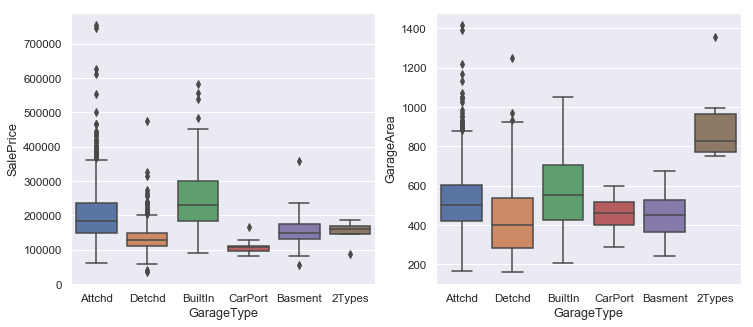

In [33]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y='SalePrice',x='GarageType',data = housing)
plt.subplot(1,2,2)
sns.boxplot(y='GarageArea',x='GarageType',data = housing)
plt.show()

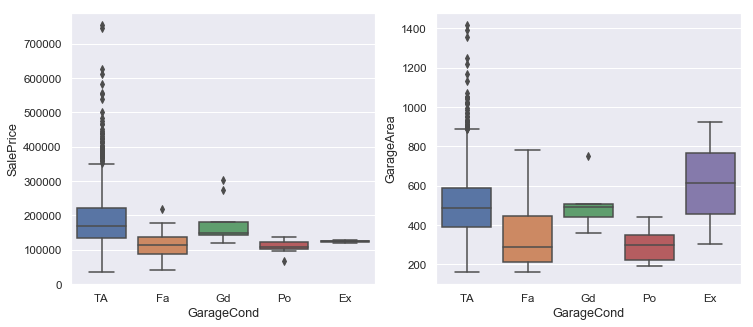

In [34]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y='SalePrice',x='GarageCond',data = housing)
plt.subplot(1,2,2)
sns.boxplot(y='GarageArea',x='GarageCond',data = housing)
plt.show()

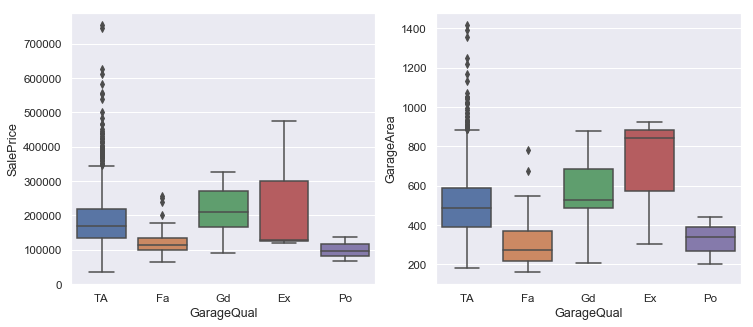

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y='SalePrice',x='GarageQual',data = housing)
plt.subplot(1,2,2)
sns.boxplot(y='GarageArea',x='GarageQual',data = housing)
plt.show()

In [36]:
housing['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    351
Name: GarageFinish, dtype: int64

In [37]:
housing['GarageFinish'].isnull().sum()

81

In [38]:
housing['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     87
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [39]:
housing['GarageCond'].value_counts()

TA    1325
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [40]:
housing['GarageQual'].value_counts()

TA    1310
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [41]:
housing['GarageYrBlt'].value_counts().head(10)

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    48
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
Name: GarageYrBlt, dtype: int64

On reading the data description of these variables we see that there is option called NA(Not applicable) - which means No Garage. So let us replace our null values with 'NoGarage'. And GarageYrBlt - with 0.0 as there is no garage.

In [42]:
housing['GarageType'] = housing['GarageType'].replace(np.NaN, 'NoGarage')
housing['GarageYrBlt'] = housing['GarageYrBlt'].replace(np.NaN, 0.0)
housing['GarageFinish'] = housing['GarageFinish'].replace(np.NaN, 'NoGarage')
housing['GarageCond'] = housing['GarageCond'].replace(np.NaN, 'NoGarage')
housing['GarageQual'] = housing['GarageQual'].replace(np.NaN, 'NoGarage')

#### Basement Variable

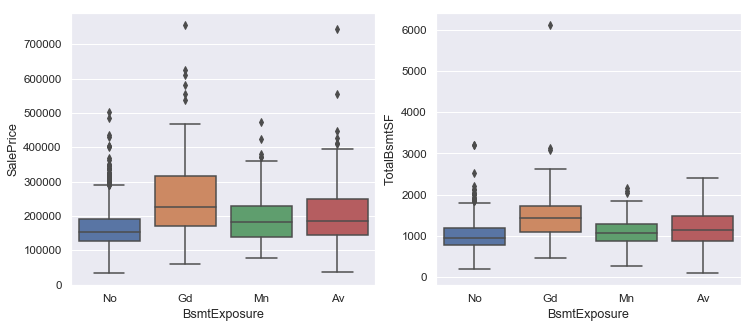

In [43]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y='SalePrice',x='BsmtExposure',data = housing)
plt.subplot(1,2,2)
sns.boxplot(y='TotalBsmtSF',x='BsmtExposure',data = housing)
plt.show()

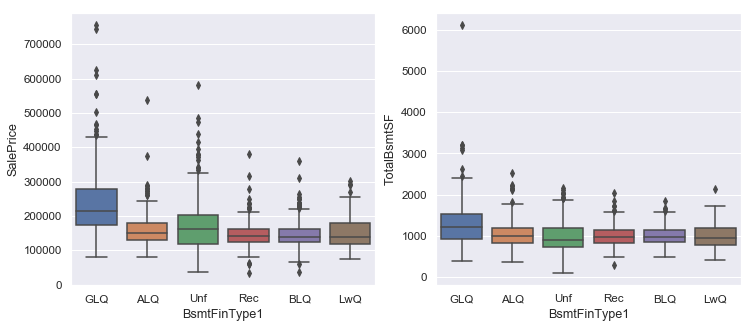

In [44]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y='SalePrice',x='BsmtFinType1',data = housing)
plt.subplot(1,2,2)
sns.boxplot(y='TotalBsmtSF',x='BsmtFinType1',data = housing)
plt.show()

In [45]:
housing['BsmtFinType2'].value_counts()

Unf    1255
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [46]:
housing['BsmtExposure'].value_counts()

No    952
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [47]:
housing['BsmtFinType1'].value_counts()

Unf    429
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [48]:
housing['BsmtCond'].value_counts()

TA    1310
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [49]:
housing['BsmtQual'].value_counts()

TA    649
Gd    617
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

On reading the data description of these variables we see that there is option called NA(Not applicable) - which means No Basement. So let us replace our null values with 'NoBasement'.

In [50]:
housing['BsmtFinType2'] = housing['BsmtFinType2'].replace(np.NaN, 'NoBasement')
housing['BsmtExposure'] = housing['BsmtExposure'].replace(np.NaN, 'NoBasement')
housing['BsmtFinType1'] = housing['BsmtFinType1'].replace(np.NaN, 'NoBasement')
housing['BsmtCond'] = housing['BsmtCond'].replace(np.NaN, 'NoBasement')
housing['BsmtQual'] = housing['BsmtQual'].replace(np.NaN, 'NoBasement')

#### Masonry veneer variables

In [51]:
housing['MasVnrType'].value_counts()

None       863
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [52]:
housing['MasVnrArea'].value_counts().head(10)

0.0      860
72.0       8
180.0      8
108.0      8
120.0      7
16.0       7
80.0       6
200.0      6
106.0      6
340.0      6
Name: MasVnrArea, dtype: int64

In [53]:
housing['MasVnrArea'] = housing['MasVnrArea'].replace(np.NaN, 0.0)
housing['MasVnrType'] = housing['MasVnrType'].replace(np.NaN, 'None')

#### Final recheck after handling the null values:

In [54]:
# Final rechecking for null values
round(100*(housing.isnull().sum()/len(housing.index)),2).sort_values(ascending = False)

SalePrice        0.0
ExterCond        0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
Foundation       0.0
SaleCondition    0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
OverallQual      0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
                ... 
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SaleType         0.0
GarageFinish     0.0
GarageType       0.0
HeatingQC        0.0
Fireplaces       0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF     

In [55]:
housing.shape

(1459, 76)

### Feature Engineering

In [56]:
housing.set_index('Id',inplace = True)

In [57]:
housing[housing.YrSold < housing.YearRemodAdd][['YearBuilt','YearRemodAdd','YrSold']]

,YearBuilt,YearRemodAdd,YrSold
Id,,,
524,2007,2008,2007


As we see YearBuilt and YearSold are happening in the same year. We can remove this row as the price of the house doesn't reflect the present house.

In [58]:
housing.drop(524,inplace = True)

In [59]:
housing[housing.YrSold < housing.YearRemodAdd][['YearBuilt','YearRemodAdd','YrSold']]

,YearBuilt,YearRemodAdd,YrSold
Id,,,


In [60]:
#Let us check few other columns
housing['ExterQual'].value_counts()

TA    905
Gd    488
Ex     51
Fa     14
Name: ExterQual, dtype: int64

If we see certain columns have ordinal categorical value. So let us map these values to numeric value.

In [61]:
housing['ExterQual'] = housing['ExterQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
housing['ExterCond'] = housing['ExterCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
housing['BsmtQual'] = housing['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NoBasement':0})
housing['BsmtCond'] = housing['BsmtCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NoBasement':0})
housing['BsmtExposure'] = housing['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'NoBasement':0})
housing['BsmtFinType1'] = housing['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NoBasement':0})
housing['BsmtFinType2'] = housing['BsmtFinType2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NoBasement':0})
housing['HeatingQC'] = housing['HeatingQC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
housing['CentralAir'] = housing['CentralAir'].map({'N':0,'Y':1})
housing['KitchenQual'] = housing['KitchenQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
housing['GarageQual'] = housing['GarageQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NoGarage':0})
housing['GarageCond'] = housing['GarageCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NoGarage':0})
housing['GarageFinish'] = housing['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'NoGarage':0})

In [62]:
# creating age of the house from year built to the sale of the house
housing['HouseAge'] =  housing['YrSold'] - housing['YearBuilt']
# age of house after remodelling
housing['RemodAddAge'] = housing['YrSold'] - housing['YearRemodAdd']
# creating age of the garage from year built of the garage to the sale of the house
housing['GarageAge'] = housing['YrSold'] - housing['GarageYrBlt'] 

In [63]:
housing.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'],axis = 1,inplace = True)

#### Inspecting few more columns:

In [64]:
housing.Utilities.value_counts()

AllPub    1457
NoSeWa       1
Name: Utilities, dtype: int64

In [65]:
#there is only a one building with Utilities other than All Public Utilities, therefore dropping the column
housing.drop('Utilities',axis = 1,inplace = True)

In [66]:
housing.PoolArea.value_counts()

0      1451
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [67]:
#since there is no  much variance dropping this column.
housing.drop('PoolArea',axis = 1,inplace = True)

In [68]:
housing['3SsnPorch'].value_counts()

0      1434
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64

In [69]:
#Again as there is no  much variance dropping this column.
housing.drop('3SsnPorch',axis = 1,inplace = True)

In [70]:
housing.MiscVal.value_counts()

0        1406
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

In [71]:
#Again as there is no  much variance dropping this column.
housing.drop('MiscVal',axis = 1,inplace = True)

In [72]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 1 to 1460
Data columns (total 70 columns):
MSSubClass       1458 non-null int64
MSZoning         1458 non-null object
LotFrontage      1458 non-null float64
LotArea          1458 non-null int64
Street           1458 non-null object
LotShape         1458 non-null object
LandContour      1458 non-null object
LotConfig        1458 non-null object
LandSlope        1458 non-null object
Neighborhood     1458 non-null object
Condition1       1458 non-null object
Condition2       1458 non-null object
BldgType         1458 non-null object
HouseStyle       1458 non-null object
OverallQual      1458 non-null int64
OverallCond      1458 non-null int64
RoofStyle        1458 non-null object
RoofMatl         1458 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non-null object
MasVnrType       1458 non-null object
MasVnrArea       1458 non-null float64
ExterQual        1458 non-null int64
ExterCond        1458 

In [73]:
categorical_columns = housing.select_dtypes(include = 'object').columns.tolist()

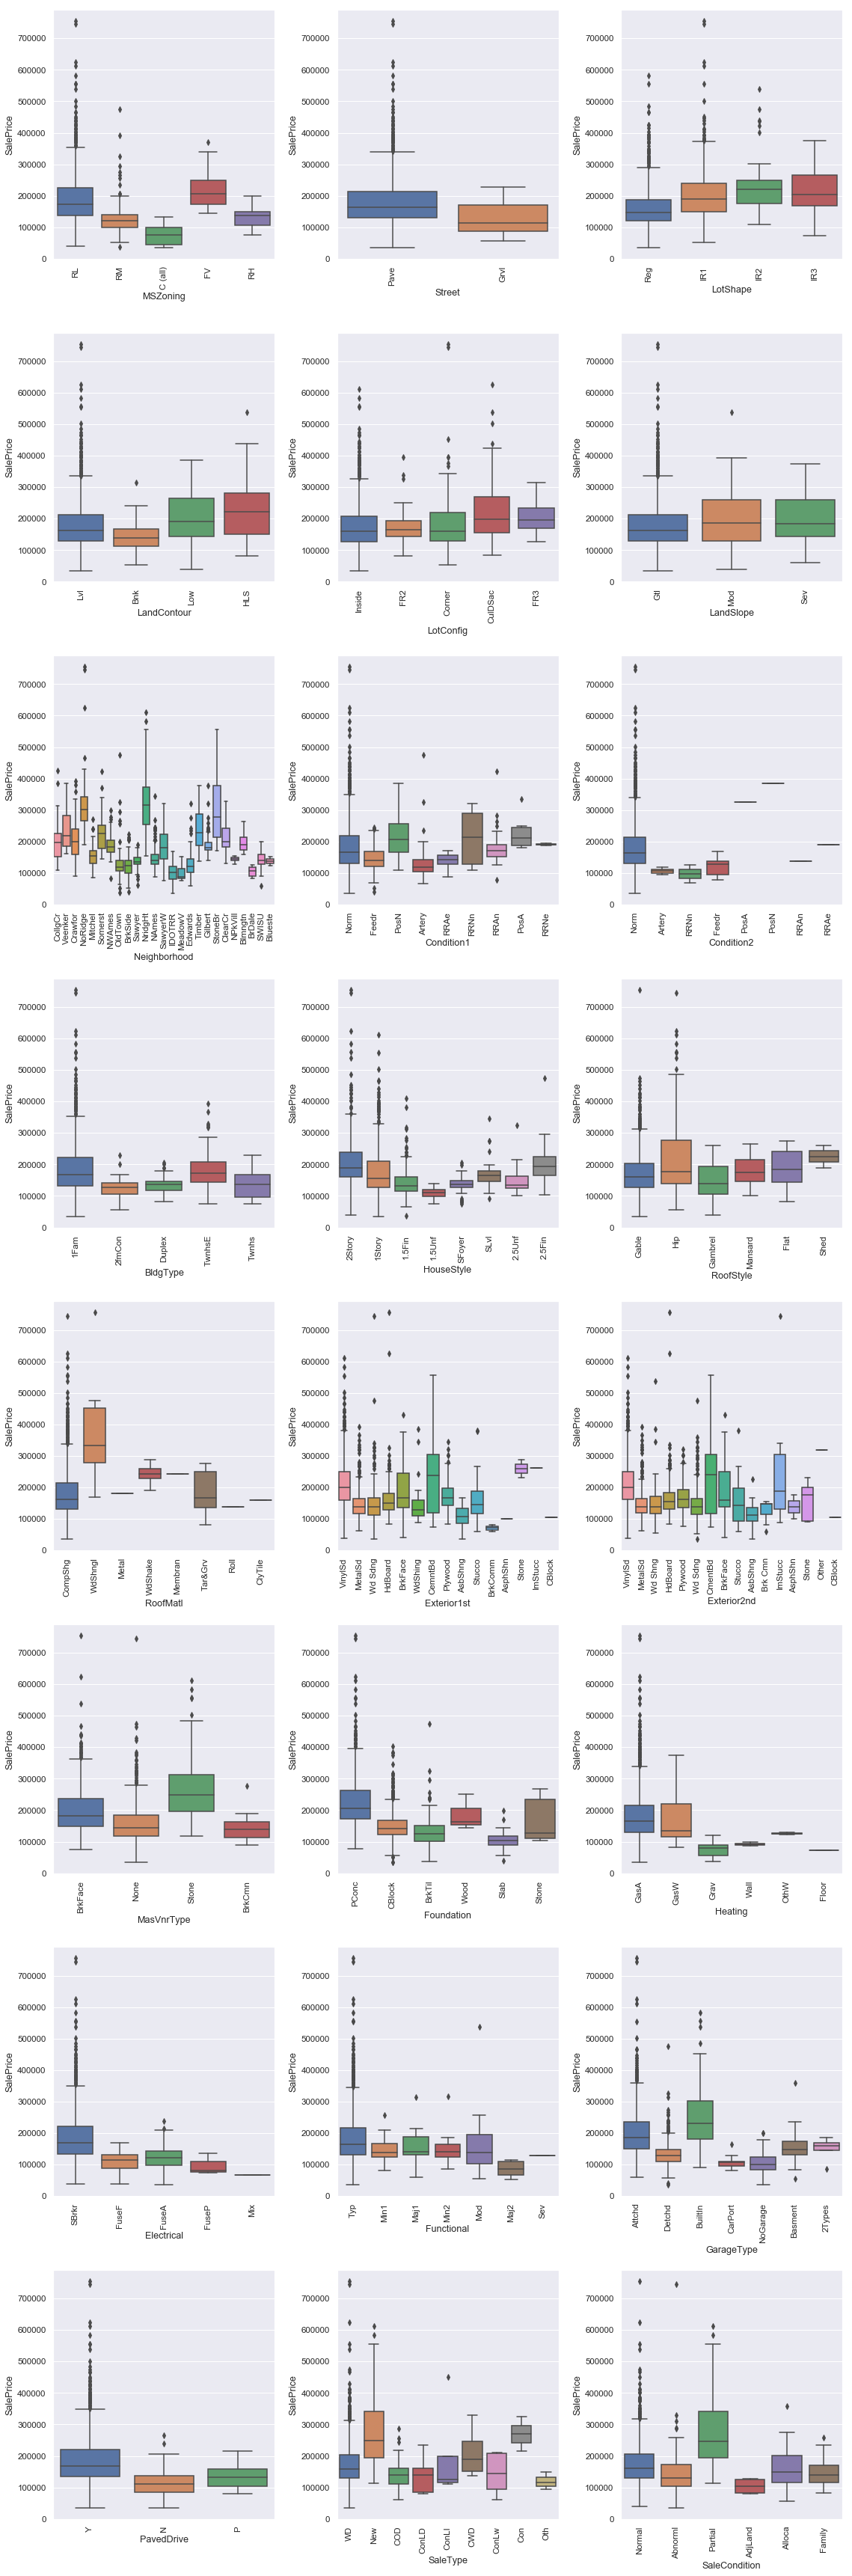

In [74]:
plt.figure(figsize = (16,48))
i = 1
for x in categorical_columns:
    plt.subplot(len(categorical_columns)//3,3,i)
    sns.boxplot(y='SalePrice',x=x,data=housing)
    plt.xticks(rotation = 'vertical')
    i = i+1
plt.tight_layout()
plt.show()

In [75]:
numeric_columns = housing.select_dtypes(exclude = 'object').columns.tolist()

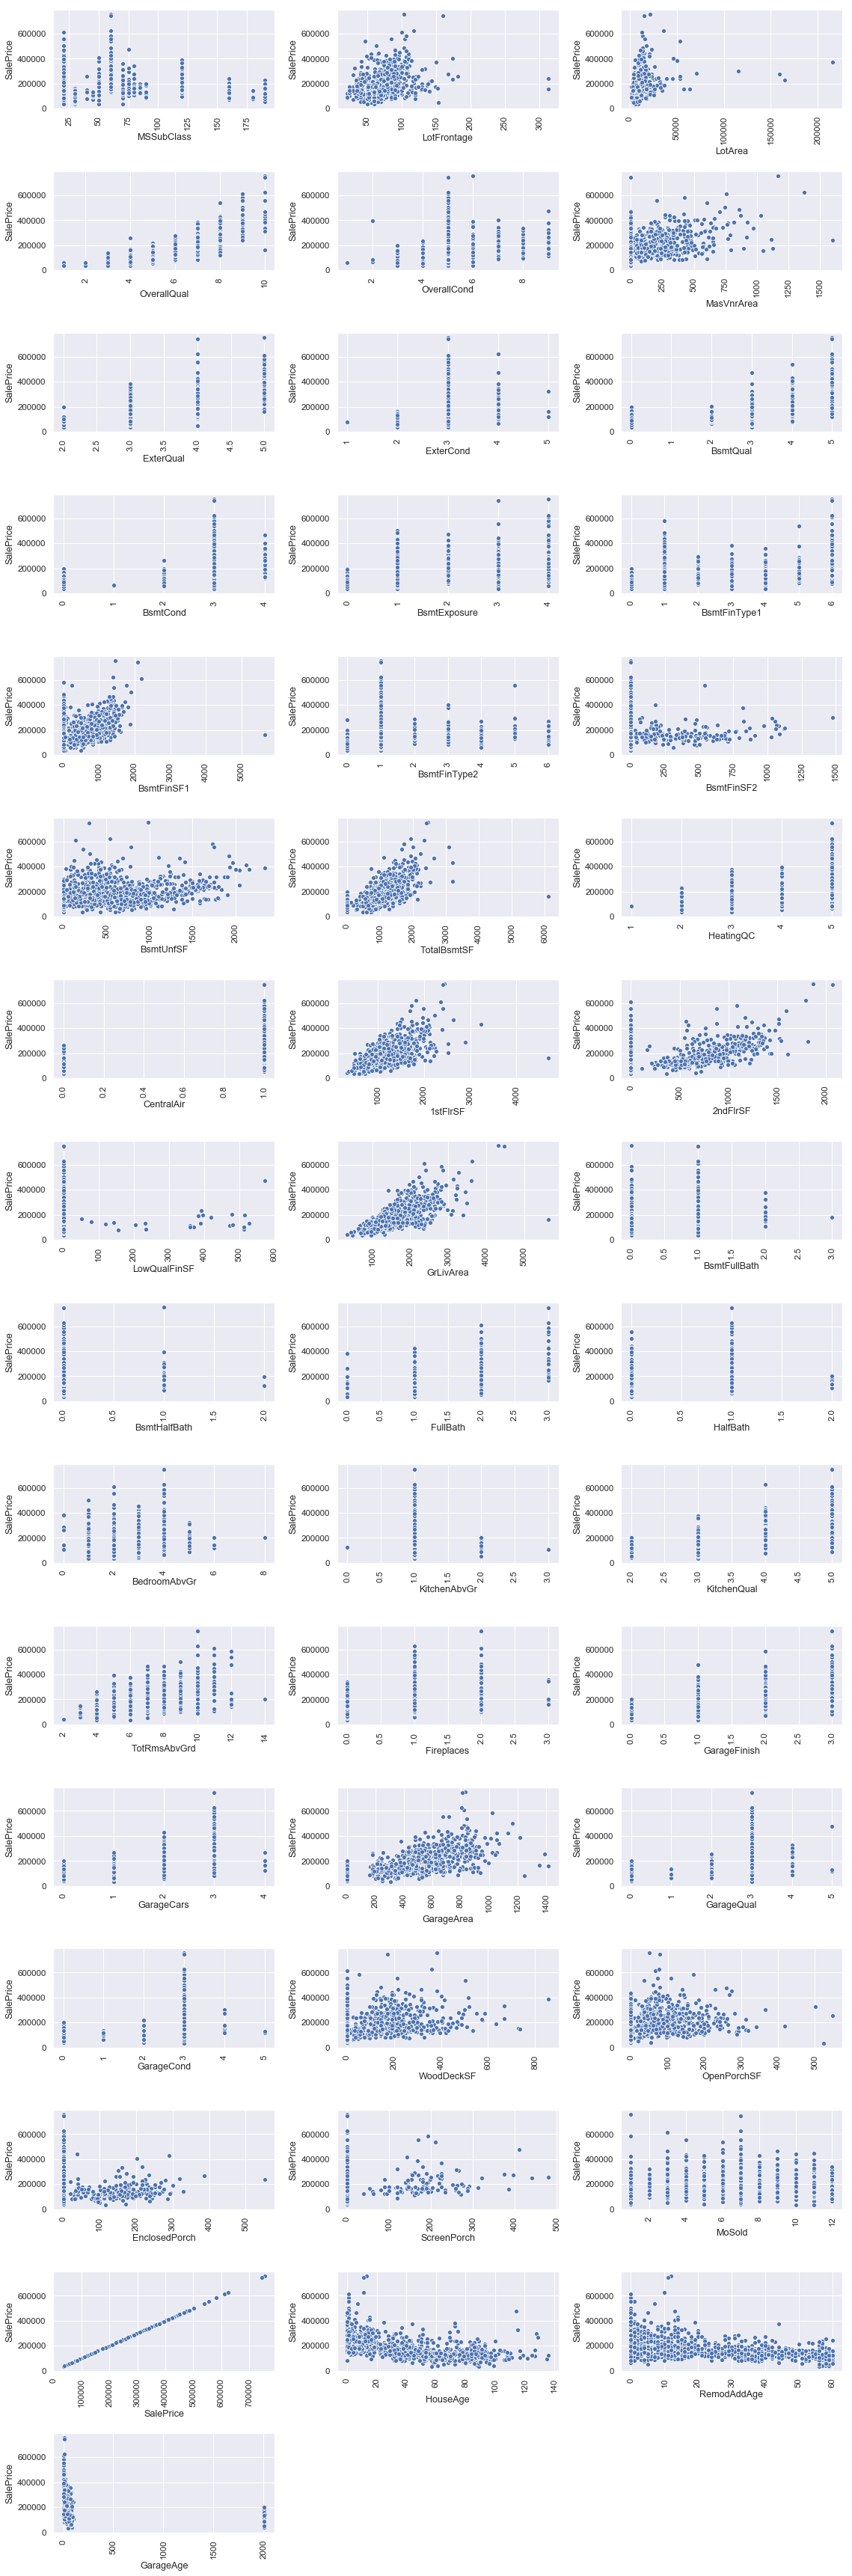

In [76]:
plt.figure(figsize = (16,48))
i = 1
for x in numeric_columns :
    plt.subplot(len(numeric_columns)//3+1,3,i)
    sns.scatterplot(y='SalePrice',x=x,data=housing)
    plt.xticks(rotation = 'vertical')
    i = i+1
plt.tight_layout()
plt.show()

#### Overallquality

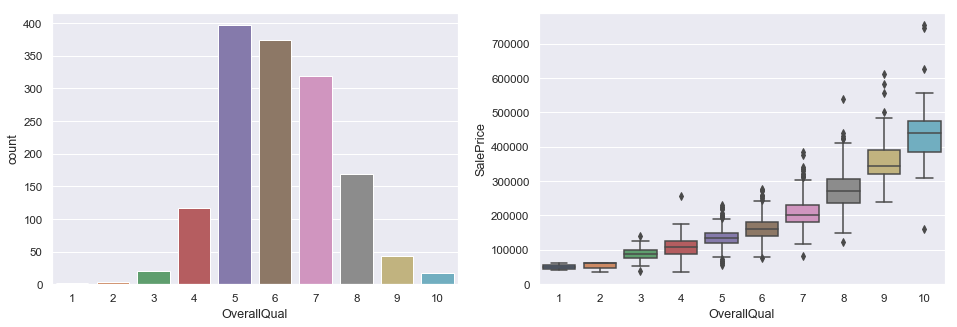

In [77]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.countplot(housing.OverallQual)
plt.subplot(1,2,2)
sns.boxplot(y='SalePrice',x='OverallQual',data = housing)
plt.show()

### Handling outliers

In [78]:
housing.describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90,0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,SalePrice,HouseAge,RemodAddAge,GarageAge
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.00000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,56.879287,70.156722,10497.078189,6.097394,5.576132,102.735940,3.395062,3.083676,3.487654,2.934842,1.628944,3.545953,442.698217,1.247599,46.613169,567.152949,1056.464335,4.144719,0.934842,1161.552126,345.974623,5.852538,1513.379287,0.425240,0.057613,1.563786,0.38203,2.866255,1.046639,3.510288,6.514403,0.613169,1.713992,1.766118,472.748285,2.810014,2.808642,94.162551,46.445816,21.984225,15.081619,6.320302,180927.775034,36.596708,22.981481,139.266118
std,42.325185,22.392394,9957.970488,1.379866,1.113359,180.009066,0.573041,0.351281,0.876083,0.552532,1.066189,2.107186,453.773839,0.892898,161.420729,442.069094,435.250893,0.959890,0.246889,383.224862,435.643333,48.655960,519.267115,0.518929,0.238907,0.549891,0.50271,0.816323,0.220483,0.662945,1.622211,0.644829,0.892174,0.747104,213.671713,0.723360,0.720144,125.389262,65.618007,61.155666,55.792877,2.703542,79496.167760,30.242180,20.637248,453.996251
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,0.000000
5%,20.000000,35.000000,3303.100000,4.000000,4.000000,0.000000,3.000000,3.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,520.000000,3.000000,0.000000,672.850000,0.000000,0.000000,848.000000,0.000000,0.000000,1.000000,0.00000,2.000000,1.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,88000.000000,1.000000,0.000000,0.000000
10%,20.000000,48.000000,5000.000000,5.000000,5.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,74.700000,637.000000,3.000000,1.000000,757.000000,0.000000,0.000000,912.000000,0.000000,0.000000,1.000000,0.00000,2.000000,1.000000,3.000000,5.000000,0.000000,1.000000,1.000000,240.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,106425.000000,1.000000,1.000000,1.000000
25%,20.000000,60.000000,7544.500000,5.000000,5.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,223.000000,796.000000,3.000000,1.000000,882.000000,0.000000,0.000000,1128.500000,0.000000,0.000000,1.000000,0.00000,2.000000,1.000000,3.000000,5.000000,0.000000,1.000000,1.000000,331.500000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129925.000000,8.000000,4.000000,7.000000
50%,50.000000,70.000000,9475.000000,6.000000,5.000000,0.000000,3.000000,3.000000,4.000000,3.000000,1.000000,4.000000,383.500000,1.000000,0.000000,477.500000,991.500000,5.000000,1.000000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.00000,3.000000,1.000000,3.0000

In [79]:
q3 = housing['LotArea'].quantile(0.99)
housing = housing[housing.LotArea <= q3]

In [80]:
q3 = housing['MasVnrArea'].quantile(0.99)
housing = housing[housing.MasVnrArea <= q3]

In [81]:
housing.shape

(1428, 70)

In [82]:
# final recheck again
housing.describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90,0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,SalePrice,HouseAge,RemodAddAge,GarageAge
count,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000
mean,56.890756,69.773459,9715.230392,6.070028,5.579132,91.668067,3.385854,3.083333,3.474090,2.932773,1.602941,3.527311,431.394958,1.240896,45.721289,566.266106,1043.382353,4.140056,0.933473,1150.614146,339.923669,5.975490,1496.513305,0.418768,0.056723,1.554622,0.378852,2.862045,1.047619,3.501401,6.487395,0.595938,1.701681,1.752101,468.556022,2.806723,2.804622,91.254202,46.177871,22.385154,14.990196,6.323529,177963.313725,36.850140,23.149160,141.690476
std,42.317210,21.354689,4109.895792,1.356806,1.118757,149.413229,0.563049,0.352271,0.874798,0.557516,1.044848,2.108137,425.609983,0.883205,159.191645,439.619953,407.757196,0.960316,0.249288,365.580074,429.134073,49.157272,493.053635,0.513024,0.237373,0.542994,0.502301,0.812405,0.222683,0.657551,1.601238,0.633041,0.888656,0.745105,211.027885,0.730099,0.727134,121.249951,65.454750,61.711346,55.731335,2.705665,74883.956343,30.316133,20.687064,458.420020
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,0.000000
5%,20.000000,35.000000,3332.450000,4.000000,4.000000,0.000000,3.000000,3.000000,2.350000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,510.900000,3.000000,0.000000,672.000000,0.000000,0.000000,848.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,88000.000000,1.000000,0.000000,0.000000
10%,20.000000,48.000000,5000.000000,5.000000,5.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,73.400000,630.000000,3.000000,1.000000,756.700000,0.000000,0.000000,909.100000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,0.000000,1.000000,1.000000,240.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,106000.000000,1.000000,1.000000,1.000000
25%,20.000000,60.000000,7500.000000,5.000000,5.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,220.750000,793.750000,3.000000,1.000000,879.750000,0.000000,0.000000,1125.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,0.000000,1.000000,1.000000,321.500000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129375.000000,8.000000,4.000000,7.000000
50%,50.000000,70.000000,9378.500000,6.000000,5.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,4.000000,378.000000,1.000000,0.000000,481.500000,984.500000,5.000000,1.000000,1080.000000,0.000000,0.000000,1456.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,

### SKewness of `SalePrice`

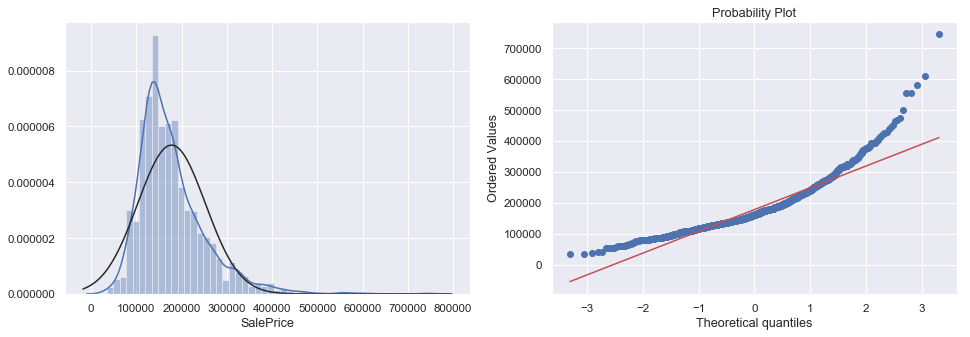

In [83]:
from scipy.stats import norm
from scipy.stats import probplot
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(housing.SalePrice,fit=norm)
plt.subplot(1,2,2)
probplot(housing.SalePrice,plot = plt)
plt.show()

In [84]:
print('Skewness:',housing.SalePrice.skew())
print('Kurtosis:',housing.SalePrice.kurt())

Skewness: 1.6841564818792483
Kurtosis: 5.328531272090053


In [85]:
#applying log transformation
housing['SalePrice'] = np.log(housing['SalePrice'])

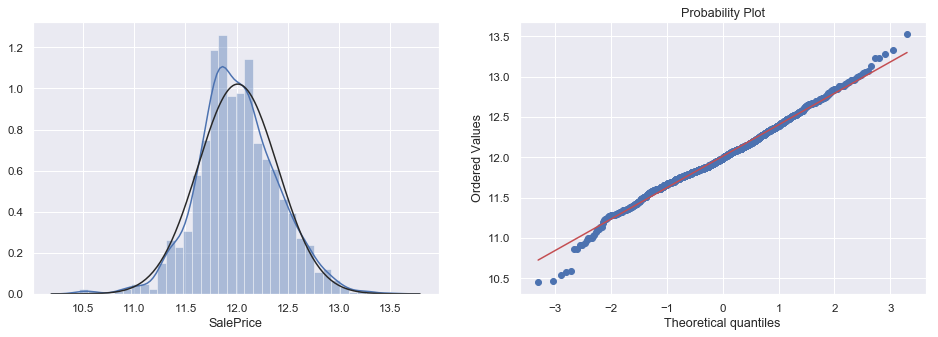

In [86]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(housing.SalePrice,fit=norm)
plt.subplot(1,2,2)
probplot(housing.SalePrice,plot = plt)
plt.show()

In [87]:
housing.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'MoSold', 'SaleType', '

### Data Preparation

In [88]:
# split into X and y
X = housing.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'MoSold', 'SaleType', 'SaleCondition',
       'HouseAge', 'RemodAddAge', 'GarageAge']]

y = housing['SalePrice']

In [89]:
# creating dummy variables for categorical variables

# subset all categorical variables
housing_categorical = X.select_dtypes(include=['object'])
housing_categorical.head()

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,GarageType,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
2,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
3,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
4,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,SBrkr,Typ,Detchd,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal


In [90]:
# convert into dummies
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [91]:
# drop categorical variables 
X = X.drop(list(housing_categorical.columns), axis=1)

In [92]:
# concat dummy variables with X
X = pd.concat([X, housing_dummies], axis=1)

In [93]:
X.shape

(1428, 194)

In [94]:
# scaling the features
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=194)

In [95]:
# split into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

C:\Users\Pramodini\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Model Building and Evaluation

### RFE:

In [96]:
lm = LinearRegression()

In [97]:
#Lets use RFE to select highly important 50 features

rfe = RFE(lm, 50)             # running RFE with 50 variables as output
rfe = rfe.fit(X_train, y_train)

In [98]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 103),
 ('LotFrontage', False, 2),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 140),
 ('ExterQual', False, 74),
 ('ExterCond', False, 21),
 ('BsmtQual', False, 104),
 ('BsmtCond', False, 117),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 67),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 57),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 7),
 ('CentralAir', False, 32),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 93),
 ('FullBath', False, 121),
 ('HalfBath', False, 50),
 ('BedroomAbvGr', False, 141),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageFinish', False, 110),
 ('GarageCars', True, 1),
 ('GarageArea', False, 69),
 ('GarageQual', True, 1),
 ('GarageCond', Fals

In [99]:
col50 = X_train.columns[rfe.support_]
col50

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageQual',
       'HouseAge', 'GarageAge', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor',
       'Neighborhood_MeadowV', 'Neighborhood_NridgHt', 'Condition2_PosA',
       'Condition2_RRAn', 'Condition2_RRNn', 'RoofMatl_Tar&Grv',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior2nd_CBlock',
       'Exterior2nd_CmentBd', 'Foundation_PConc', 'Heating_GasA',
       'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall',
       'Functional_Min1', 'Functional_Min2', 'Functional_Typ',
       'GarageType_NoGarage', 'SaleType_CWD', 'SaleType_New',
       'SaleCondition_Normal'],
      dtype='object')

### Ridge Regression

In [100]:
X_train_final = X_train[col50]

In [101]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 
                    5.0, 6.0, 7.0, 8.0, 9.0, 10.0,20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_final, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [102]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=20]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.0048,0.001721,0.00040,0.000800,0.0001,{'alpha': 0.0001},-0.073004,-0.085607,-0.083619,-0.076918,-0.076111,-0.079055,0.004768,25,-0.074961,-0.070968,-0.071805,-0.074256,-0.073579,-0.073114,0.001500
1,0.0020,0.002450,0.00372,0.005986,0.001,{'alpha': 0.001},-0.073004,-0.085603,-0.083619,-0.076918,-0.076111,-0.079054,0.004767,24,-0.074960,-0.070968,-0.071806,-0.074256,-0.073579,-0.073114,0.001500
2,0.0072,0.003250,0.00080,0.000748,0.01,{'alpha': 0.01},-0.073001,-0.085570,-0.083617,-0.076925,-0.076112,-0.079048,0.004757,23,-0.074957,-0.070977,-0.071808,-0.074256,-0.073580,-0.073115,0.001496
3,0.0070,0.003633,0.00040,0.000490,0.05,{'alpha': 0.05},-0.072992,-0.085449,-0.083608,-0.076951,-0.076122,-0.079027,0.004721,22,-0.074946,-0.071007,-0.071816,-0.074257,-0.073582,-0.073122,0.001483
4,0.0052,0.002315,0.00060,0.000490,0.1,{'alpha': 0.1},-0.072981,-0.085341,-0.083599,-0.076975,-0.076133,-0.079009,0.004690,21,-0.074935,-0.071040,-0.071824,-0.074258,-0.073584,-0.073128,0.001470


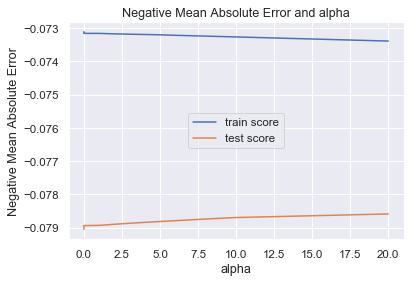

In [103]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='center')
plt.show()

In [104]:
alpha = 9
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_final, y_train)
ridge.coef_

array([ 2.38871210e-02,  7.02148649e-02,  5.02183354e-02,  1.63673205e-02,
        2.94688779e-02,  9.87630243e-03,  1.96199543e-03,  3.67302060e-02,
        4.75462934e-02,  4.69619353e-02,  2.57605851e-03,  7.63843391e-02,
        1.53641443e-02, -2.15410886e-02,  1.87745842e-02,  1.56156953e-02,
        1.61711002e-02,  3.23781903e-02,  1.82701205e-02, -7.44005456e-02,
       -1.72900188e-03,  4.12113529e-02,  1.92303270e-02,  6.14562947e-02,
        2.98228469e-02,  1.56609526e-02,  2.41134056e-02, -1.66901484e-02,
        1.53273728e-02,  5.98911430e-31,  3.88580153e-31,  0.00000000e+00,
       -1.16729677e-02,  1.38705534e-02, -1.35302066e-03, -1.35302066e-03,
        1.25344133e-02,  2.97108106e-02, -5.40422576e-04,  3.72185346e-03,
       -6.88722443e-03, -2.27437300e-03,  4.56314057e-03,  1.79397140e-02,
        1.33320710e-02,  3.40291172e-02,  1.03143106e-02, -1.31132913e-02,
        3.73540261e-02,  3.10631174e-02])

In [105]:
Y_train_ridge = y_train.copy()

In [106]:
from sklearn.metrics import r2_score
model_ridge=ridge.fit(X_train_final, Y_train_ridge)
# predict
y_train_pred = ridge.predict(X_train_final)
print(model_ridge.score(X_train_final, Y_train_ridge))
print(r2_score(y_true=Y_train_ridge, y_pred=y_train_pred))

0.9307093575216321
0.9307093575216321


In [107]:
X_test_ridge = X_test[col50]
Y_test_ridge = y_test.copy()

In [108]:
y_test_pred = ridge.predict(X_test_ridge)
print(model_ridge.score(X_test_ridge, Y_test_ridge))
print(r2_score(y_true=Y_test_ridge, y_pred=y_test_pred))

0.8940862600987103
0.8940862600987103


Train is 93.07% and test is 89.40%

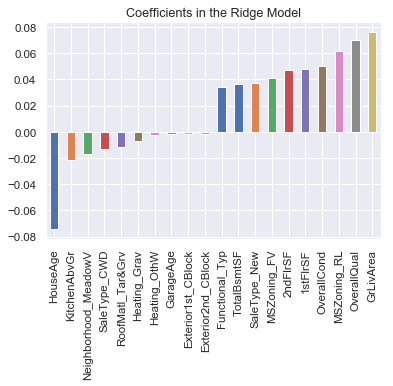

In [109]:
# Plot important coefficients

coefs = pd.Series(ridge.coef_, index = X_train_final.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "bar")
plt.title("Coefficients in the Ridge Model")

plt.show()

In [110]:
coefs.sort_values().head(10)

HouseAge               -0.074401
KitchenAbvGr           -0.021541
Neighborhood_MeadowV   -0.016690
SaleType_CWD           -0.013113
RoofMatl_Tar&Grv       -0.011673
Heating_Grav           -0.006887
Heating_OthW           -0.002274
GarageAge              -0.001729
Exterior1st_CBlock     -0.001353
Exterior2nd_CBlock     -0.001353
dtype: float64

In [111]:
coefs.sort_values().tail(10)

Functional_Typ    0.034029
TotalBsmtSF       0.036730
SaleType_New      0.037354
MSZoning_FV       0.041211
2ndFlrSF          0.046962
1stFlrSF          0.047546
OverallCond       0.050218
MSZoning_RL       0.061456
OverallQual       0.070215
GrLivArea         0.076384
dtype: float64

In [112]:
ridge_df = pd.DataFrame() 
ridge_df['Coeff Values'] = pd.Series(ridge.coef_) 
ridge_df['Variables'] = X_train_final.columns

# Removing rows that have coeff = 0
ridge_df = ridge_df.loc[ridge_df['Coeff Values']!=0]

ridge_df['Absolute Coefficent'] =ridge_df['Coeff Values'].apply(lambda x:abs(x))
ridge_df.sort_values(by=['Absolute Coefficent'],inplace=True,ascending=False)

print(ridge_df.head(20))

    Coeff Values             Variables  Absolute Coefficent
11      0.076384             GrLivArea             0.076384
19     -0.074401              HouseAge             0.074401
1       0.070215           OverallQual             0.070215
23      0.061456           MSZoning_RL             0.061456
2       0.050218           OverallCond             0.050218
8       0.047546              1stFlrSF             0.047546
9       0.046962              2ndFlrSF             0.046962
21      0.041211           MSZoning_FV             0.041211
48      0.037354          SaleType_New             0.037354
7       0.036730           TotalBsmtSF             0.036730
45      0.034029        Functional_Typ             0.034029
17      0.032378            GarageCars             0.032378
49      0.031063  SaleCondition_Normal             0.031063
24      0.029823           MSZoning_RM             0.029823
37      0.029711      Foundation_PConc             0.029711
4       0.029469            BsmtFinSF1  

As per Ridge regression significant(top 5) variables which effect the price of houses are

#### positively are ( increases the price):
    
    GrLivArea: Above grade (ground) living area square feet
    OverallQual: Rates the overall material and finish of the house
    MSZoning_RL:  zoning classification of the sale - Residential Medium Density 
    OverallCond : Rates the overall condition of the house
    1stFlrSF: First Floor square feet 
    
#### negatively are ( decreases the price):
    HouseAge  : Age of the house             
    KitchenAbvGr  : Kitchens above grade        
    Neighborhood_MeadowV : Physical locations within Ames city limits - Meadow Village   
    SaleType_CWD :Type of sale - Warranty Deed - Cash
    RoofMatl_Tar&Grv : Roof material- Gravel & Tar


### Lasso

In [113]:
X_train_lasso = X_train[col50]

In [114]:
lasso = Lasso()
folds = 10

params = {'alpha': [0.0001, 0.001,0.002,0.003,0.005,0.008]}


# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lasso, y_train) 

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.4s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.002, 0.003, 0.005, 0.008]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [115]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.081581,0.014900,0.00000,0.000000,0.0001,{'alpha': 0.0001},-0.064964,-0.078731,-0.088872,-0.085558,-0.070404,-0.094694,-0.067193,-0.080218,-0.077532,-0.076327,-0.078452,0.008976,2,-0.074933,-0.073599,-0.072618,-0.072320,-0.074067,-0.071584,-0.074824,-0.073373,-0.073379,-0.073819,-0.073452,0.001004
1,0.018420,0.004968,0.00000,0.000000,0.001,{'alpha': 0.001},-0.064575,-0.076114,-0.089928,-0.084628,-0.067938,-0.096274,-0.067323,-0.079169,-0.077463,-0.078604,-0.078201,0.009601,1,-0.075292,-0.074111,-0.072651,-0.072855,-0.074768,-0.071821,-0.075276,-0.073834,-0.073849,-0.073892,-0.073835,0.001076
2,0.014751,0.006302,0.00120,0.000843,0.002,{'alpha': 0.002},-0.065017,-0.076224,-0.090574,-0.083708,-0.068060,-0.097160,-0.067483,-0.079484,-0.077304,-0.080469,-0.078546,0.009724,3,-0.075705,-0.074621,-0.073032,-0.073324,-0.075229,-0.072386,-0.075719,-0.074373,-0.074343,-0.074213,-0.074294,0.001058
3,0.009550,0.006790,0.00156,0.004680,0.003,{'alpha': 0.003},-0.065590,-0.076537,-0.090924,-0.082904,-0.068376,-0.097910,-0.067956,-0.080223,-0.077833,-0.082967,-0.079118,0.009772,4,-0.076368,-0.075344,-0.073767,-0.074028,-0.075986,-0.073140,-0.076371,-0.075093,-0.075046,-0.074916,-0.075006,0.001038
4,0.009620,0.004016,0.00100,0.001225,0.005,{'alpha': 0.005},-0.066989,-0.076378,-0.089897,-0.082540,-0.070838,-0.098978,-0.068145,-0.082115,-0.078591,-0.086378,-0.080079,0.009587,5,-0.077675,-0.077165,-0.075065,-0.075848,-0.077466,-0.074616,-0.077687,-0.076554,-0.076518,-0.076217,-0.076481,0.001014


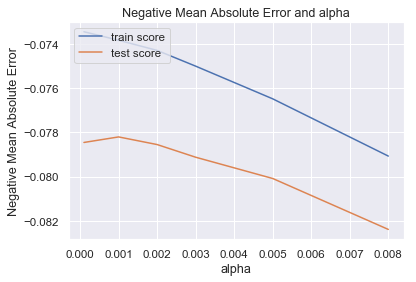

In [116]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [117]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lasso, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [118]:
(lasso.coef_)

array([ 2.32377425e-02,  7.30708235e-02,  5.09814159e-02,  1.56534002e-02,
        2.65349741e-02,  7.68939141e-03, -0.00000000e+00,  3.85042178e-02,
        7.71644158e-03,  0.00000000e+00, -2.23149866e-03,  1.32282856e-01,
        1.57960423e-02, -1.97264201e-02,  1.76652735e-02,  1.24088029e-02,
        1.59674383e-02,  3.17379115e-02,  1.04986032e-02, -7.57298599e-02,
       -0.00000000e+00,  2.35426398e-02,  9.80157960e-03,  2.84576606e-02,
        0.00000000e+00,  1.48250848e-02,  2.30778702e-02, -1.51162504e-02,
        1.44159486e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -9.77699752e-03,  1.30718081e-02, -1.89737354e-03, -3.02525743e-17,
        1.12289980e-02,  2.86203112e-02, -0.00000000e+00,  1.31137265e-03,
       -6.19129722e-03, -1.58863608e-03,  3.60112281e-03,  1.45158475e-02,
        9.55496208e-03,  2.94075240e-02,  0.00000000e+00, -8.83866208e-03,
        3.72323028e-02,  3.07980188e-02])

In [119]:
list(zip(X_train_lasso.columns,lasso.coef_))

[('LotArea', 0.023237742487515884),
 ('OverallQual', 0.07307082352677405),
 ('OverallCond', 0.05098141590524478),
 ('BsmtExposure', 0.015653400211173802),
 ('BsmtFinSF1', 0.026534974115473495),
 ('BsmtFinSF2', 0.007689391413813954),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.03850421784137154),
 ('1stFlrSF', 0.0077164415828558566),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0022314986579353613),
 ('GrLivArea', 0.13228285643701562),
 ('BsmtFullBath', 0.015796042282584792),
 ('KitchenAbvGr', -0.01972642010690107),
 ('KitchenQual', 0.017665273541803365),
 ('TotRmsAbvGrd', 0.012408802889173638),
 ('Fireplaces', 0.015967438261905595),
 ('GarageCars', 0.03173791151025734),
 ('GarageQual', 0.0104986032017484),
 ('HouseAge', -0.07572985985664092),
 ('GarageAge', -0.0),
 ('MSZoning_FV', 0.023542639796104697),
 ('MSZoning_RH', 0.0098015796015944),
 ('MSZoning_RL', 0.02845766056508048),
 ('MSZoning_RM', 0.0),
 ('Neighborhood_BrkSide', 0.01482508481173736),
 ('Neighborhood_Crawfor', 0.0230778701834648

In [120]:
Y_train_lasso = y_train.copy()

In [121]:
model_lasso=lasso.fit(X_train_lasso, Y_train_lasso)

# predict
y_train_pred = lasso.predict(X_train_lasso)
print(model_lasso.score(X_train_lasso, Y_train_lasso))
print(r2_score(y_true=Y_train_lasso, y_pred=y_train_pred))

0.9297278719283295
0.9297278719283294


In [122]:
X_test_lasso = X_test[col50]
Y_test_lasso = y_test.copy()

In [123]:
y_test_pred = lasso.predict(X_test_lasso)
print(model_lasso.score(X_test_lasso, Y_test_lasso))
print(r2_score(y_true=Y_test_lasso, y_pred=y_test_pred))

0.8934553722894647
0.8934553722894647


Train is 92.97% and test is 89.34%

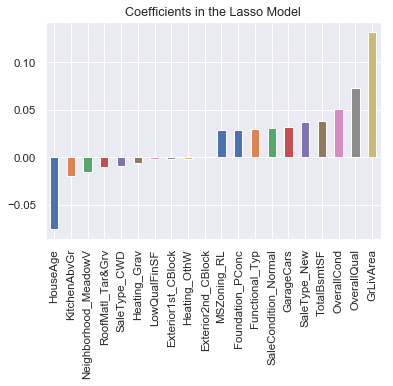

In [124]:
# Plot important coefficients

coefs = pd.Series(lasso.coef_, index = X_train_lasso.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "bar")
plt.title("Coefficients in the Lasso Model")

plt.show()

In [125]:
lasso_df = pd.DataFrame() 
lasso_df['Coeff Values'] = pd.Series(lasso.coef_) 
lasso_df['Variables'] = X_train_lasso.columns

# Removing rows that have coeff = 0
lasso_df = lasso_df.loc[lasso_df['Coeff Values']!=0]

lasso_df['Absolute Coefficent'] =lasso_df['Coeff Values'].apply(lambda x:abs(x))
lasso_df.sort_values(by=['Absolute Coefficent'],inplace=True,ascending=False)

print(lasso_df.head(20))

    Coeff Values             Variables  Absolute Coefficent
11      0.132283             GrLivArea             0.132283
19     -0.075730              HouseAge             0.075730
1       0.073071           OverallQual             0.073071
2       0.050981           OverallCond             0.050981
7       0.038504           TotalBsmtSF             0.038504
48      0.037232          SaleType_New             0.037232
17      0.031738            GarageCars             0.031738
49      0.030798  SaleCondition_Normal             0.030798
45      0.029408        Functional_Typ             0.029408
37      0.028620      Foundation_PConc             0.028620
23      0.028458           MSZoning_RL             0.028458
4       0.026535            BsmtFinSF1             0.026535
21      0.023543           MSZoning_FV             0.023543
0       0.023238               LotArea             0.023238
26      0.023078  Neighborhood_Crawfor             0.023078
13     -0.019726          KitchenAbvGr  

In [126]:
coefs.sort_values().head(10)

HouseAge               -7.572986e-02
KitchenAbvGr           -1.972642e-02
Neighborhood_MeadowV   -1.511625e-02
RoofMatl_Tar&Grv       -9.776998e-03
SaleType_CWD           -8.838662e-03
Heating_Grav           -6.191297e-03
LowQualFinSF           -2.231499e-03
Exterior1st_CBlock     -1.897374e-03
Heating_OthW           -1.588636e-03
Exterior2nd_CBlock     -3.025257e-17
dtype: float64

In [127]:
coefs.sort_values().tail(10)

MSZoning_RL             0.028458
Foundation_PConc        0.028620
Functional_Typ          0.029408
SaleCondition_Normal    0.030798
GarageCars              0.031738
SaleType_New            0.037232
TotalBsmtSF             0.038504
OverallCond             0.050981
OverallQual             0.073071
GrLivArea               0.132283
dtype: float64

As per Lasso regression significant(top 5) variables which effect the price of houses are

#### positively are ( increases the price):

    GrLivArea: Above grade (ground) living area square feet 
    OverallQual: Rates the overall material and finish of the house 
    OverallCond : Rates the overall condition of the house 
    TotalBsmtSF: Total square feet of basement area
    SaleType : Type of sale - Home just constructed and sold

#### negatively are ( decreases the price):

    HouseAge : Age of the house
    KitchenAbvGr : Kitchens above grade
    Neighborhood_MeadowV : Physical locations within Ames city limits - Meadow Village
    RoofMatl_Tar&Grv : Roof material- Gravel & Tar
    SaleType_CWD :Type of sale - Warranty Deed - Cash 


#### Comparsion between lasso and ridge regression model:

-Negatively effecting variables have remained the same in both the models.

-However, there few changes in positively effecting variables (top5- as per co-efficient):

We had got these variables in lasso :

    GrLivArea: Above grade (ground) living area square feet 
    OverallQual: Rates the overall material and finish of the house 
    OverallCond : Rates the overall condition of the house 
    TotalBsmtSF: Total square feet of basement area
    SaleType : Type of sale - Home just constructed and sold
        
compared to these in ridge because of change im co-efficient value. 
     
    GrLivArea: Above grade (ground) living area square feet
    OverallQual: Rates the overall material and finish of the house
    MSZoning_RL:  zoning classification of the sale - Residential Medium Density 
    OverallCond : Rates the overall condition of the house
    1stFlrSF: First Floor square feet 
    
-Overall top 10 variables in both the model remain the same. 